In [149]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import BytesIO

1) Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика с 2020-06-15 по 2020-06-17
Данные для построения графика хранятся здесь.

Hint: для получения нужных данных понадобится фильтр по дате и параметр isRobots

Hint2: чтобы применить фильтр по дате воспользуйтесь &filters=ym:s:date=='date_which_you_need'

In [68]:
# url - ссылка на яндекс метрику, после ? пишем что нас интересует:
# отберем визиты, фильтруем по дате и узнаем яв-ся ли юзер роботом,  
# указываем id демо-версии Яндекс-метрики, все пункты отделяем: &
# создадим пустой df и список дат, проходимся в цикле url + visits + date

dates = ['2020-06-15', '2020-06-16', '2020-06-17']

url = 'https://api-metrika.yandex.net/stat/v1/data?'

df = pd.DataFrame()

for date in dates:
    visits = f"metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='{date}'&dimensions=ym:s:isRobot&id=44147844"
    visits_url = url + visits
    response = requests.get(visits_url)

    json_data = response.json()
    
    for record in json_data['data']:
        # извлекаем данные из словаря data
        intermediate_data = record['dimensions']
        
        visits = record['metrics'][0]
        date = intermediate_data[0]['name']
        robot_type = intermediate_data[1]['name']
        
        # создаем строку и добавляем ее в df
        row = [[date, robot_type, visits]]
        df = df.append(row)

In [69]:
# запрос по одной дате, возвращает вот такой результат, но data [] !!! 

response.json()

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:date', 'ym:s:isRobot'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2022-02-21',
  'date2': '2022-02-27',
  'filters': "ym:s:date=='2020-06-17'",
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [],
 'total_rows': 0,
 'total_rows_rounded': False,
 'sampled': False,
 'contains_sensitive_data': False,
 'sample_share': 1.0,
 'sample_size': 3697,
 'sample_space': 3697,
 'data_lag': 158,
 'totals': [0.0],
 'min': [0.0],
 'max': [0.0]}

Далее нужно распарсить полученные данные, однако у яндекс метрики сменился протокол и вместо date, теперь он отдает date1 и date2. Чтобы сэкономить время для нашей учебной цели возьмем уже распарсенные дынные из приложенного step_1_lesson_7.csv

Получим кол-во визитов роботов и людей по датам:

In [81]:
df = pd.read_csv('/home/ag/MyProjects/Karpov_Py_course/7/MiniProject/step_1_lesson_7.csv')

In [74]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<AxesSubplot:xlabel='date', ylabel='visits'>

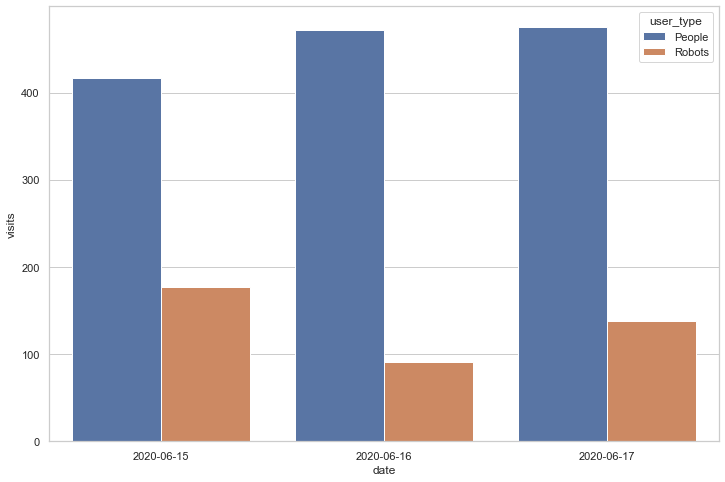

In [80]:
# построим график по датам посещений с разбивкой на ботов и людей
# сделаем его крупнее задав параметры в sns.set:

sns.set(style='whitegrid',
        rc={'figure.figsize': (12, 8)})

sns.barplot(x='date', 
            y='visits', 
            hue='user_type',
            data=df)

2) Скачайте данные по ссылке.
При помощи функции np.where создайте серию, в которую будет записываться 1, если посещения были сделаны роботами с браузера, содержащего Chrome в названии и 0, в других случаях. Поместите получившуюся серию в переменную chrome_robots.

Hint:   ответ должен быть в форме pd.Series

Hint2:  в numpy более жесткие требования к логическим действиям, чем в пандасе - выражения должны быть окружены скобками и вместо or/and нужно писать | или &

In [84]:
url = 'https://stepik.org/media/attachments/lesson/361619/karpov_courses_test.csv'

In [86]:
df = pd.read_csv(url)
df

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15
5,2020-06-14,Safari,People,13
6,2020-06-14,Firefox,Robots,8
7,2020-06-14,Android Browser,People,8
8,2020-06-14,Opera,People,5
9,2020-06-14,Mobile Safari,People,5


In [99]:
# функция np.where позволяет смотря по условию возвращать либо одно, либо другое значение
# ((условие1) & (условие2), 1 if True, 0 when False) получаем array, сохраняем в chrome_robots
# и затем пересохраням как пандасовскую серию

chrome_robots = np.where(
    (df.user_type == 'Robots') & (df.browser.str.contains('Chrome')),
    1, 0
)

chrome_robots = pd.Series(chrome_robots)

In [101]:
chrome_robots  # всего 2 случая когда боты заходили с Chrome

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
dtype: int64

3) 💀 Задание со звёздочкой! 💀

Давайте выясним, с какого браузера приходит меньше всего ботов. Посмотрите на данные за 14 июня (2020-06-14) и определите, у какого браузера самая маленькая доля посещений сайта ботами от общего числа посещений?

В качестве ответа укажите название браузера.

Hint:  а тут нужны все параметры, которые мы использовали до этого 

Hint2: то есть фильтр по дате, browser, isRobot тут нужны все параметры, которые мы использовали до этого

In [106]:
# сгруппируем по браузеру и посчитаем сумму заходов по каждому

visits_vs_browser = df.groupby('browser', as_index=False) \
                      .agg({'users': 'sum'})

In [107]:
visits_vs_browser

,browser,users
0,Android Browser,9
1,Chrome Mobile,36
2,Chromium,2
3,CocCoc,1
4,Edge,3
5,Firefox,23
6,Firefox Mobile,1
7,Google Chrome,167
8,Mobile Safari,5
9,Opera,6


In [112]:
# смерджим агрегированные данные с иходным df: users_x из исходного df
# users_type в исходном df, a users_all = People + Robots

full_df = df.merge(visits_vs_browser, 
                     on='browser',
                     suffixes=('_type', '_all'))

In [113]:
full_df

,date,browser,user_type,users_type,users_all
0,2020-06-14,Google Chrome,People,139,167
1,2020-06-14,Google Chrome,Robots,28,167
2,2020-06-14,Chrome Mobile,People,35,36
3,2020-06-14,Chrome Mobile,Robots,1,36
4,2020-06-14,Yandex Browser,People,22,23
5,2020-06-14,Yandex Browser,Robots,1,23
6,2020-06-14,Firefox,People,15,23
7,2020-06-14,Firefox,Robots,8,23
8,2020-06-14,Safari,People,13,15
9,2020-06-14,Safari,Robots,2,15


In [115]:
# посчитаем долю типа посетителя к общему числу посещений

full_df['ratio'] = full_df.users_type / full_df.users_all

full_df.head()

,date,browser,user_type,users_type,users_all,ratio
0,2020-06-14,Google Chrome,People,139,167,0.832335
1,2020-06-14,Google Chrome,Robots,28,167,0.167665
2,2020-06-14,Chrome Mobile,People,35,36,0.972222
3,2020-06-14,Chrome Mobile,Robots,1,36,0.027778
4,2020-06-14,Yandex Browser,People,22,23,0.956522


In [121]:
# отфильтруем только роботов из общего df и найдем наименьшиее число
# через метод nsmallest, указав колонку ratio и ск-ко строк вернуть
# наш ответ тип браузера:  Chrome Mobile

full_df.query('user_type == "Robots"') \
        .nsmallest(1, columns='ratio')

,date,browser,user_type,users_type,users_all,ratio
3,2020-06-14,Chrome Mobile,Robots,1,36,0.027778


4) 💀 Задание со звёздочкой! 💀

Сагрегируйте данные по дню, типу пользователя, браузеру, создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

PS: данные нужны за 14 июня

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [126]:
# комбинация значений во всех колонках уникальна - везде False = 0
# поэтому группировать не нужно

df.duplicated(['date', 'browser', 'user_type']).sum()

0

In [131]:
# считаем долю визитов по каждому браузеру / сумму всех визитов по всем браузерам
# переводим в % и задаем в отдельную колонку

df['percent'] = df.users / df.users.sum() * 100

In [140]:
df

,date,browser,user_type,users,percent
0,2020-06-14,Google Chrome,People,139,46.488294
1,2020-06-14,Chrome Mobile,People,35,11.705686
2,2020-06-14,Google Chrome,Robots,28,9.364548
3,2020-06-14,Yandex Browser,People,22,7.357860
4,2020-06-14,Firefox,People,15,5.016722
5,2020-06-14,Safari,People,13,4.347826
6,2020-06-14,Firefox,Robots,8,2.675585
7,2020-06-14,Android Browser,People,8,2.675585
8,2020-06-14,Opera,People,5,1.672241
9,2020-06-14,Mobile Safari,People,5,1.672241


In [144]:
# отбираем только людей заходивших с Safari, переводим в % через percent
# и округляем до 1 знака: ответ 4,3 % от общего числа заходов

df.query('user_type == "People" and browser == "Safari"') \
    .percent \
    .round(1)

5    4.3
Name: percent, dtype: float64

5) ⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики, и вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

Вот так можно прочитать данные другого аналитика:

from io import BytesIO
import requests

r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')

data = r.content

df = pd.read_csv(BytesIO(data))

In [147]:
# читаем первый df

df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [148]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [152]:
# читаем второй файл из гугл диска с помощью библиотеки BytesIO, импортируем ее в начале

r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')

data = r.content

df2 = pd.read_csv(BytesIO(data))

In [153]:
df2

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [154]:
df.shape

(24, 4)

In [156]:
# размер двух df одинаковый!

df2.shape

(24, 4)

In [158]:
# объединим оба df через merge по общим колонкам: date, browser, user_type

full_data = df.merge(df2, on=['date', 'browser', 'user_type'])

In [159]:
full_data

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [160]:
# определяем отношение visits к users в разрезе браузера и значения Robots/People
# результат поместим в новую колонку ratio

full_data['ratio'] = full_data.visits / full_data.users

In [161]:
full_data

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.033333
5,2020-06-15,Firefox,People,27.0,26.0,1.038462
6,2020-06-15,Safari,Robots,22.0,20.0,1.100000
7,2020-06-15,Safari,People,19.0,17.0,1.117647
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.071429
9,2020-06-15,Opera,People,11.0,10.0,1.100000


In [163]:
# запросом отбираем число визитов на уникального пользователя 
# совершаемых ботами с Google Chrome:   ответ 1

full_data.query('browser == "Google Chrome" and user_type == "Robots"')

,date,browser,user_type,visits,users,ratio
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
